# Distribution and Description of Distribution Statistics

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
from scipy import poisson
import matplotlib.pyplot as plt
import seaborn as sns


#imported the original dataset which included all the states 

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56033,Sheridan County,WY,30485,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,142
3189,3189,56035,Sublette County,WY,9831,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3190,3190,56037,Sweetwater County,WY,42343,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3191,3191,56039,Teton County,WY,23464,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51


In [3]:


#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

Filtering out the state of Massachussets to perform statistical analysis of covid cases and plot a histogram 

In [18]:

#filtered the cleaned data to access only the state of Massachussets 
data[data['State'].str.contains('MA')]



,Unnamed: 0,countyFIPS,County Name,State,population,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,...,2020-12-18_Deaths,2020-12-19_Deaths,2020-12-20_Deaths,2020-12-21_Deaths,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths
1239,1239,0,Statewide Unallocated,MA,0,1557,1561,1561,1563,1566,...,213,215,217,217,217,217,226,217,217,217
1240,1240,25001,Barnstable County,MA,212990,602,604,604,604,609,...,116,117,119,119,119,119,125,119,119,119
1241,1241,25003,Berkshire County,MA,124944,8321,8331,8348,8365,8399,...,989,993,995,995,995,995,1016,995,995,995
1242,1242,25005,Bristol County,MA,565217,51,51,51,53,55,...,0,0,0,0,0,0,0,0,0,0
1243,1243,25007,Dukes County,MA,17332,16254,16283,16318,16342,16379,...,1569,1578,1586,1586,1586,1586,1625,1586,1586,1586
1244,1244,25009,Essex County,MA,789034,373,373,373,376,381,...,82,82,84,84,84,84,88,84,84,84
1245,1245,25011,Franklin County,MA,70180,6870,6883,6895,6903,6932,...,991,994,1003,1003,1003,1003,1024,1003,1003,1003
1246,1246,25013,Hampden County,MA,466372,985,985,986,991,993,...,179,181,181,181,181,181,184,181,181,181
1247,1247,25015,Hampshire County,MA,160830,24153,24193,24243,24300,24348,...,2573,2582,2597,2597,2597,2597,2644,2597,2597,2597
1248,1248,25017,Middlesex County,MA,1611699,20,20,20,21,22,...,2,2,2,2,2,2,2,2,2,2


In [20]:
#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('MA')]

,Unnamed: 0,countyFIPS,County Name,State,population,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,...,2020-12-18_Deaths,2020-12-19_Deaths,2020-12-20_Deaths,2020-12-21_Deaths,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths
1239,1239,0,Statewide Unallocated,MA,0,1557,1561,1561,1563,1566,...,213,215,217,217,217,217,226,217,217,217
1240,1240,25001,Barnstable County,MA,212990,602,604,604,604,609,...,116,117,119,119,119,119,125,119,119,119
1241,1241,25003,Berkshire County,MA,124944,8321,8331,8348,8365,8399,...,989,993,995,995,995,995,1016,995,995,995
1242,1242,25005,Bristol County,MA,565217,51,51,51,53,55,...,0,0,0,0,0,0,0,0,0,0
1243,1243,25007,Dukes County,MA,17332,16254,16283,16318,16342,16379,...,1569,1578,1586,1586,1586,1586,1625,1586,1586,1586
1244,1244,25009,Essex County,MA,789034,373,373,373,376,381,...,82,82,84,84,84,84,88,84,84,84
1245,1245,25011,Franklin County,MA,70180,6870,6883,6895,6903,6932,...,991,994,1003,1003,1003,1003,1024,1003,1003,1003
1246,1246,25013,Hampden County,MA,466372,985,985,986,991,993,...,179,181,181,181,181,181,184,181,181,181
1247,1247,25015,Hampshire County,MA,160830,24153,24193,24243,24300,24348,...,2573,2582,2597,2597,2597,2597,2644,2597,2597,2597
1248,1248,25017,Middlesex County,MA,1611699,20,20,20,21,22,...,2,2,2,2,2,2,2,2,2,2


In [24]:
#filtered out just cases of Massachussets 

cases_df = filtered_data.filter(like='Cases', axis=1) 
cases_df

,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
1239,1557,1561,1561,1563,1566,1570,1574,1578,1582,1586,...,4549,4680,4744,4801,4976,4976,4976,4976,4976,4976
1240,602,604,604,604,609,610,611,613,615,615,...,2422,2447,2488,2602,2633,2633,2633,2633,2633,2633
1241,8321,8331,8348,8365,8399,8426,8442,8460,8491,8527,...,29118,29681,30031,30874,31122,31122,31122,31122,31122,31122
1242,51,51,51,53,55,56,59,58,58,57,...,412,418,424,424,434,434,434,434,434,434
1243,16254,16283,16318,16342,16379,16414,16452,16469,16485,16530,...,50323,50870,51609,53118,53479,53479,53479,53479,53479,53479
1244,373,373,373,376,381,383,384,384,384,384,...,1134,1152,1169,1219,1236,1236,1236,1236,1236,1236
1245,6870,6883,6895,6903,6932,6943,6974,7000,7019,7039,...,22520,22713,23064,24071,24379,24379,24379,24379,24379,24379
1246,985,985,986,991,993,995,1001,1008,1008,1012,...,3184,3221,3264,3448,3507,3507,3507,3507,3507,3507
1247,24153,24193,24243,24300,24348,24377,24436,24483,24536,24600,...,66255,67039,67910,69108,69844,69844,69844,69844,69844,69844
1248,20,20,20,21,22,22,22,22,22,23,...,651,651,665,668,669,669,669,669,669,669


In [54]:
#calculated the mean for by weeks

cases_array = cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 7649
The mean number of cases for week 2 was: 7763
The mean number of cases for week 3 was: 7897
The mean number of cases for week 4 was: 8057
The mean number of cases for week 5 was: 8254
The mean number of cases for week 6 was: 8407
The mean number of cases for week 7 was: 8490
The mean number of cases for week 8 was: 8713
The mean number of cases for week 9 was: 8880
The mean number of cases for week 10 was: 9031
The mean number of cases for week 11 was: 9195
The mean number of cases for week 12 was: 9357
The mean number of cases for week 13 was: 9576
The mean number of cases for week 14 was: 9843
The mean number of cases for week 15 was: 10205
The mean number of cases for week 16 was: 10636
The mean number of cases for week 17 was: 11172
The mean number of cases for week 18 was: 11796
The mean number of cases for week 19 was: 12759
The mean number of cases for week 20 was: 13997
The mean number of cases for week 21 was: 15278
The mean number

In [55]:
mean_cases_df.min()

    7649.47619
dtype: float64

In [56]:
mean_cases_df.max()

    23439.733333
dtype: float64

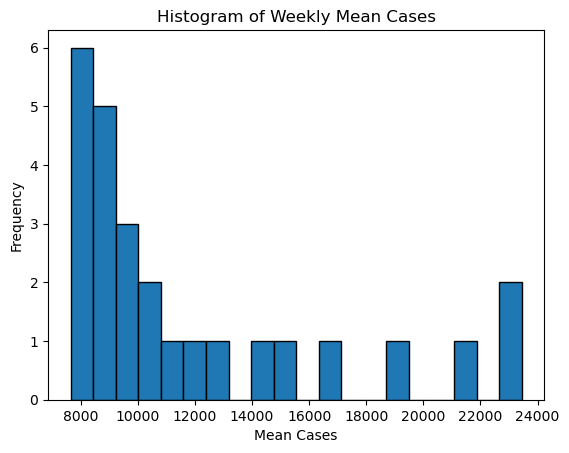

In [74]:
plt.hist(mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

In [58]:
mean_cases_df.median()


    9709.533333
dtype: float64

In [59]:
mean_cases_df.skew()

    1.365876
dtype: float64

In [60]:
mean_cases_df.kurt()

    0.699356
dtype: float64

In [61]:
mean_cases_df.var()

    2.414277e+07
dtype: float64

Filtering out the state of North Carolina to perform statistical analysis of covid cases and plot a histogram 

In [62]:
data[data['State'].str.contains('NC')]

,Unnamed: 0,countyFIPS,County Name,State,population,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,...,2020-12-18_Deaths,2020-12-19_Deaths,2020-12-20_Deaths,2020-12-21_Deaths,2020-12-22_Deaths,2020-12-23_Deaths,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths
1925,1925,0,Statewide Unallocated,NC,0,118,124,134,138,140,...,22,26,26,26,26,26,26,26,26,26
1926,1926,37001,Alamance County,NC,169509,37,37,37,37,39,...,2,2,2,2,2,2,2,2,2,2
1927,1927,37003,Alexander County,NC,37497,149,155,162,171,176,...,19,19,19,19,19,19,19,19,19,19
1928,1928,37005,Alleghany County,NC,11137,57,60,60,61,61,...,17,17,17,17,17,17,17,17,17,17
1929,1929,37007,Anson County,NC,24446,15,18,18,19,21,...,15,15,15,15,15,15,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2021,37191,Wayne County,NC,123131,764,786,800,837,854,...,94,97,100,100,100,100,100,100,100,100
2022,2022,37193,Wilkes County,NC,68412,341,351,357,358,364,...,24,24,24,24,24,24,24,24,24,24
2023,2023,37195,Wilson County,NC,81801,49,50,50,50,52,...,5,5,6,6,6,6,6,6,6,6
2024,2024,37197,Yadkin County,NC,37667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
NC = data[data['State'].str.contains('NC')]

filtered_data1 =data[data['State'].str.contains('NC')]

NC_cases_df = filtered_data1.filter(like='Cases', axis=1) 


In [81]:
#calculated the mean by weeks

NC_cases_array = NC_cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = NC_cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = NC_cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


NC_mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 758
The mean number of cases for week 2 was: 891
The mean number of cases for week 3 was: 1022
The mean number of cases for week 4 was: 1150
The mean number of cases for week 5 was: 1261
The mean number of cases for week 6 was: 1355
The mean number of cases for week 7 was: 1445
The mean number of cases for week 8 was: 1550
The mean number of cases for week 9 was: 1656
The mean number of cases for week 10 was: 1748
The mean number of cases for week 11 was: 1829
The mean number of cases for week 12 was: 1926
The mean number of cases for week 13 was: 2054
The mean number of cases for week 14 was: 2171
The mean number of cases for week 15 was: 2302
The mean number of cases for week 16 was: 2439
The mean number of cases for week 17 was: 2563
The mean number of cases for week 18 was: 2735
The mean number of cases for week 19 was: 2914
The mean number of cases for week 20 was: 3117
The mean number of cases for week 21 was: 3365
The mean number of cases

In [82]:
NC_mean_cases_df.min(),NC_mean_cases_df.max(),NC_mean_cases_df.median(),NC_mean_cases_df.skew(), NC_mean_cases_df.kurt(), NC_mean_cases_df.var()

(    757.828854
 dtype: float64,
     4759.554455
 dtype: float64,
     2112.082037
 dtype: float64,
     0.683577
 dtype: float64,
    -0.488458
 dtype: float64,
     1.403002e+06
 dtype: float64)

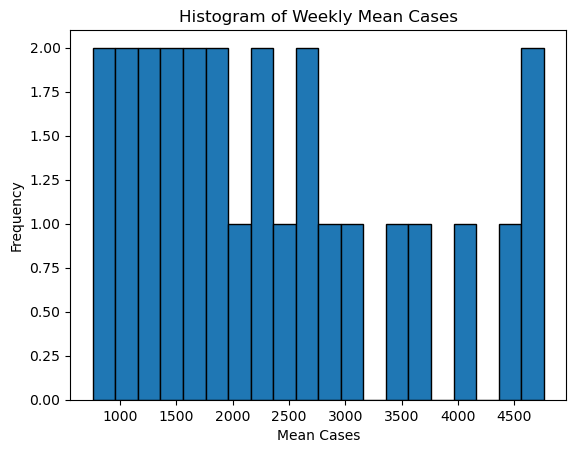

In [83]:
plt.hist(NC_mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

Filtering out the state of Ohio to perform statistical analysis of covid cases and plot a histogram 

In [86]:
OH = data[data['State'].str.contains('OH')]

filtered_data2 =data[data['State'].str.contains('OH')]

OH_cases_df = filtered_data2.filter(like='Cases', axis=1) 

OH_cases_df

,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
2080,315,321,323,328,338,348,356,366,385,391,...,7318,7405,7499,7598,7689,7750,7825,7825,7923,7983
2081,59,59,60,62,62,63,67,68,69,78,...,2196,2265,2327,2348,2374,2403,2476,2476,2535,2560
2082,433,435,436,437,438,445,447,448,452,452,...,3417,3453,3504,3523,3556,3597,3636,3636,3686,3705
2083,56,59,63,79,91,111,139,167,192,201,...,2775,2797,2826,2841,2863,2885,2926,2926,2960,2968
2084,106,107,107,107,109,109,109,111,112,112,...,3253,3288,3302,3326,3366,3393,3442,3442,3473,3490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,70,71,72,72,72,74,76,76,77,77,...,1948,1991,2014,2043,2074,2100,2135,2135,2168,2176
2165,421,428,436,452,461,474,488,494,510,515,...,7218,7328,7391,7473,7551,7635,7735,7735,7858,7932
2166,58,59,59,60,61,62,63,63,66,66,...,1316,1347,1389,1398,1416,1455,1493,1493,1532,1542
2167,1,1,1,1,1,1,1,1,1,1,...,74,67,90,92,97,105,124,124,137,153


In [89]:
#calculated the mean by weeks

OH_cases_array = OH_cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = OH_cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = OH_cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


OH_mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 680
The mean number of cases for week 2 was: 782
The mean number of cases for week 3 was: 888
The mean number of cases for week 4 was: 992
The mean number of cases for week 5 was: 1086
The mean number of cases for week 6 was: 1174
The mean number of cases for week 7 was: 1251
The mean number of cases for week 8 was: 1328
The mean number of cases for week 9 was: 1419
The mean number of cases for week 10 was: 1502
The mean number of cases for week 11 was: 1584
The mean number of cases for week 12 was: 1657
The mean number of cases for week 13 was: 1739
The mean number of cases for week 14 was: 1837
The mean number of cases for week 15 was: 1962
The mean number of cases for week 16 was: 2122
The mean number of cases for week 17 was: 2324
The mean number of cases for week 18 was: 2605
The mean number of cases for week 19 was: 3027
The mean number of cases for week 20 was: 3487
The mean number of cases for week 21 was: 4258
The mean number of cases f

In [91]:
OH_mean_cases_df.min(),OH_mean_cases_df.max(),OH_mean_cases_df.median(),OH_mean_cases_df.skew(), OH_mean_cases_df.kurt(), OH_mean_cases_df.var()

(    679.512039
 dtype: float64,
     7541.067416
 dtype: float64,
     1787.959069
 dtype: float64,
     1.29401
 dtype: float64,
     0.479647
 dtype: float64,
     4.325977e+06
 dtype: float64)

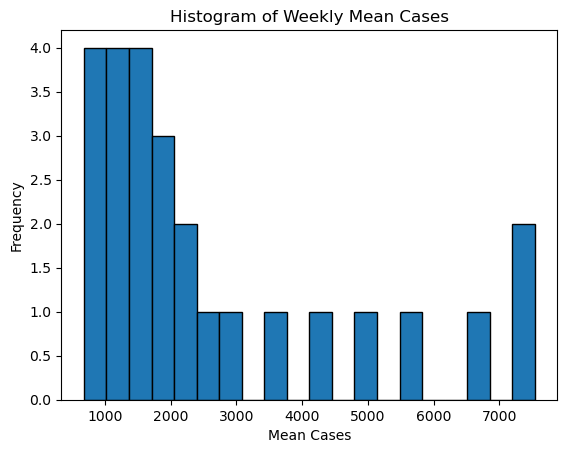

In [92]:
plt.hist(OH_mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

Filtering out the state of Virginia to perform statistical analysis of covid cases and plot a histogram 

In [93]:
VA = data[data['State'].str.contains('VA')]

filtered_data3 =data[data['State'].str.contains('VA')]

VA_cases_df = filtered_data3.filter(like='Cases', axis=1) 

VA_cases_df

,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
2868,460,467,472,498,512,520,533,552,563,578,...,2433,2433,2469,2483,2509,2552,2592,2616,2617,2686
2869,35,36,38,39,39,39,40,52,52,52,...,582,582,586,600,612,653,674,689,694,698
2870,45,45,46,48,49,49,49,50,51,53,...,327,327,332,335,338,340,341,342,342,344
2871,37,38,38,38,38,38,40,40,40,40,...,1204,1204,1221,1236,1260,1281,1312,1335,1350,1361
2872,43,43,44,44,44,46,47,47,48,48,...,578,578,584,594,605,617,629,640,652,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,92,94,102,113,114,117,121,123,125,126,...,984,984,991,993,994,1019,1034,1070,1082,1124
2998,72,74,75,77,78,78,78,78,82,85,...,344,344,346,346,346,348,349,350,350,352
2999,334,334,334,334,334,336,340,354,356,357,...,1448,1448,1460,1467,1484,1506,1536,1555,1570,1593
3000,140,186,116,137,145,119,119,137,171,143,...,1379,1342,1342,1577,1387,1405,1468,1405,1405,1405


In [94]:
#calculated the mean by weeks

VA_cases_array = VA_cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = VA_cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = VA_cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


VA_mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 499
The mean number of cases for week 2 was: 544
The mean number of cases for week 3 was: 595
The mean number of cases for week 4 was: 652
The mean number of cases for week 5 was: 707
The mean number of cases for week 6 was: 764
The mean number of cases for week 7 was: 812
The mean number of cases for week 8 was: 861
The mean number of cases for week 9 was: 914
The mean number of cases for week 10 was: 966
The mean number of cases for week 11 was: 1018
The mean number of cases for week 12 was: 1065
The mean number of cases for week 13 was: 1106
The mean number of cases for week 14 was: 1153
The mean number of cases for week 15 was: 1208
The mean number of cases for week 16 was: 1262
The mean number of cases for week 17 was: 1321
The mean number of cases for week 18 was: 1390
The mean number of cases for week 19 was: 1468
The mean number of cases for week 20 was: 1561
The mean number of cases for week 21 was: 1690
The mean number of cases for wee

In [95]:
VA_mean_cases_df.min(),VA_mean_cases_df.max(),VA_mean_cases_df.median(),VA_mean_cases_df.skew(), VA_mean_cases_df.kurt(), VA_mean_cases_df.var()

(    498.634328
 dtype: float64,
     2499.30597
 dtype: float64,
     1129.617271
 dtype: float64,
     0.779651
 dtype: float64,
    -0.186465
 dtype: float64,
     321716.144939
 dtype: float64)

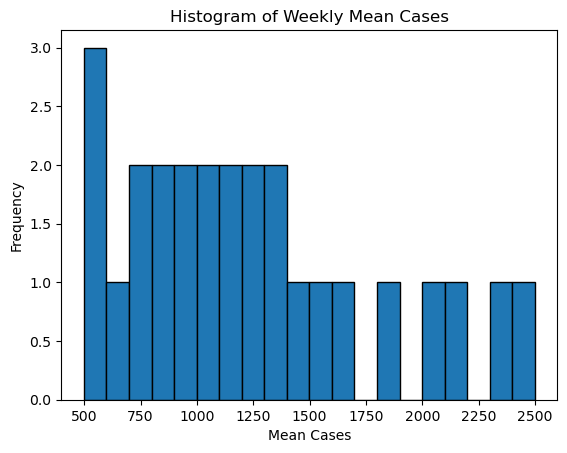

In [96]:
plt.hist(VA_mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

Filtering out the state of Kentucky to perform statistical analysis of covid cases and plot a histogram 

In [99]:
KY = data[data['State'].str.contains('KY')]

filtered_data4 =data[data['State'].str.contains('KY')]

KY_cases_df = filtered_data4.filter(like='Cases', axis=1) 

KY_cases_df

,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
1011,126,129,130,131,131,136,141,142,142,149,...,1103,1149,1161,1161,1172,1173,1173,1173,1179,1181
1012,171,176,180,181,183,185,189,189,191,193,...,977,1001,1007,1012,1038,1055,1055,1055,1086,1090
1013,29,29,29,30,30,30,31,31,31,34,...,790,813,815,824,843,874,874,874,925,925
1014,14,15,15,15,15,16,17,18,18,22,...,206,214,217,217,217,220,220,220,225,227
1015,92,97,98,104,107,116,124,128,129,135,...,2351,2384,2392,2401,2437,2461,2461,2461,2485,2490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,42,45,45,48,49,52,53,55,55,55,...,672,679,679,686,686,697,697,697,711,717
1128,32,40,41,47,49,49,51,54,54,57,...,2346,2420,2444,2455,2487,2579,2579,2579,2609,2609
1129,4,4,4,4,4,4,4,4,4,6,...,266,272,274,277,280,284,284,284,296,297
1130,73,74,75,76,76,80,81,83,84,86,...,1122,1145,1156,1165,1173,1184,1184,1184,1199,1208


In [100]:
#calculated the mean by weeks

KY_cases_array = KY_cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = KY_cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = KY_cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


KY_mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 148
The mean number of cases for week 2 was: 171
The mean number of cases for week 3 was: 204
The mean number of cases for week 4 was: 238
The mean number of cases for week 5 was: 272
The mean number of cases for week 6 was: 306
The mean number of cases for week 7 was: 341
The mean number of cases for week 8 was: 376
The mean number of cases for week 9 was: 415
The mean number of cases for week 10 was: 450
The mean number of cases for week 11 was: 487
The mean number of cases for week 12 was: 527
The mean number of cases for week 13 was: 571
The mean number of cases for week 14 was: 630
The mean number of cases for week 15 was: 690
The mean number of cases for week 16 was: 755
The mean number of cases for week 17 was: 843
The mean number of cases for week 18 was: 941
The mean number of cases for week 19 was: 1058
The mean number of cases for week 20 was: 1207
The mean number of cases for week 21 was: 1372
The mean number of cases for week 22 was

In [108]:
KY_mean_cases_df.min(),KY_mean_cases_df.max(),KY_mean_cases_df.median(),KY_mean_cases_df.skew(), KY_mean_cases_df.kurt(), KY_mean_cases_df.var()

(    147.698937
 dtype: float64,
     2127.867769
 dtype: float64,
     600.590909
 dtype: float64,
     0.930661
 dtype: float64,
    -0.346814
 dtype: float64,
     381444.017427
 dtype: float64)

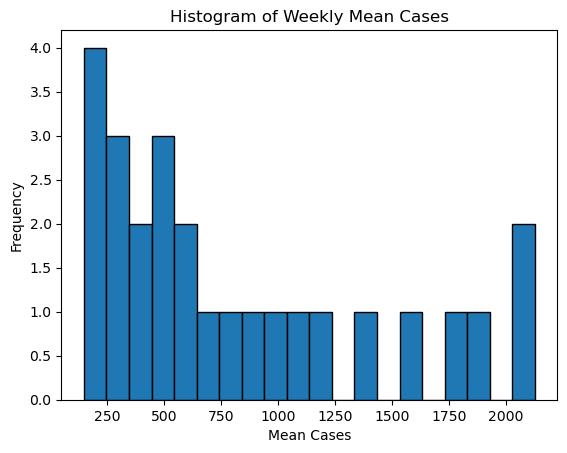

In [102]:
plt.hist(KY_mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

Filtering out the state of Tennessee to perform statistical analysis of covid cases and plot a histogram 

In [103]:
TN = data[data['State'].str.contains('TN')]

filtered_data5 =data[data['State'].str.contains('TN')]

TN_cases_df = filtered_data5.filter(like='Cases', axis=1) 

TN_cases_df

,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
2472,580,581,589,596,603,617,624,628,632,643,...,3969,4025,4058,4167,4194,4223,4269,4365,4384,4410
2473,12,12,12,12,12,13,13,13,14,14,...,1084,1099,1113,1117,1129,1134,1141,1152,1166,1178
2474,626,629,632,636,637,638,639,640,640,643,...,1435,1457,1475,1494,1500,1507,1511,1522,1544,1553
2475,219,228,260,276,279,301,343,346,356,360,...,8595,8891,9001,9343,9472,9616,9688,9839,10013,10118
2476,708,761,783,861,903,936,959,991,1032,1071,...,7728,7880,8026,8171,8275,8388,8480,8576,8645,8717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,73,77,80,81,84,84,88,90,91,99,...,2412,2441,2465,2500,2518,2536,2558,2575,2627,2644
2564,1266,1327,1375,1480,1521,1631,1683,1739,1858,1932,...,14987,15259,15455,15778,15968,16200,16425,16740,16960,17120
2565,944,984,1010,1075,1110,1147,1171,1214,1250,1289,...,10542,10728,10915,11180,11285,11453,11559,11763,11893,11973
2566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#calculated the mean by weeks

TN_cases_array = TN_cases_df.to_numpy()

# using for loop to calculate the mean 
num_columns = TN_cases_array.shape[1]
window_size = 7
mean = []

for i in range(0, num_columns, window_size):
    window = TN_cases_array[:, i:i+window_size]
    window_mean = np.mean(window)
    mean.append(window_mean)


TN_mean_cases_df = pd.DataFrame({'': mean})

# outputting the mean 
for week_number, mean in enumerate(mean, start=1):
    print(f"The mean number of cases for week {week_number} was: {mean:.0f}")

The mean number of cases for week 1 was: 574
The mean number of cases for week 2 was: 712
The mean number of cases for week 3 was: 864
The mean number of cases for week 4 was: 1029
The mean number of cases for week 5 was: 1170
The mean number of cases for week 6 was: 1297
The mean number of cases for week 7 was: 1410
The mean number of cases for week 8 was: 1513
The mean number of cases for week 9 was: 1618
The mean number of cases for week 10 was: 1717
The mean number of cases for week 11 was: 1812
The mean number of cases for week 12 was: 1915
The mean number of cases for week 13 was: 2011
The mean number of cases for week 14 was: 2120
The mean number of cases for week 15 was: 2254
The mean number of cases for week 16 was: 2403
The mean number of cases for week 17 was: 2586
The mean number of cases for week 18 was: 2736
The mean number of cases for week 19 was: 2967
The mean number of cases for week 20 was: 3263
The mean number of cases for week 21 was: 3518
The mean number of cases 

In [107]:
TN_mean_cases_df.min(),TN_mean_cases_df.max(),TN_mean_cases_df.median(),TN_mean_cases_df.skew(), TN_mean_cases_df.kurt(), TN_mean_cases_df.var()

(    573.986607
 dtype: float64,
     5593.4375
 dtype: float64,
     2065.243304
 dtype: float64,
     0.862477
 dtype: float64,
    -0.026304
 dtype: float64,
     1.965784e+06
 dtype: float64)

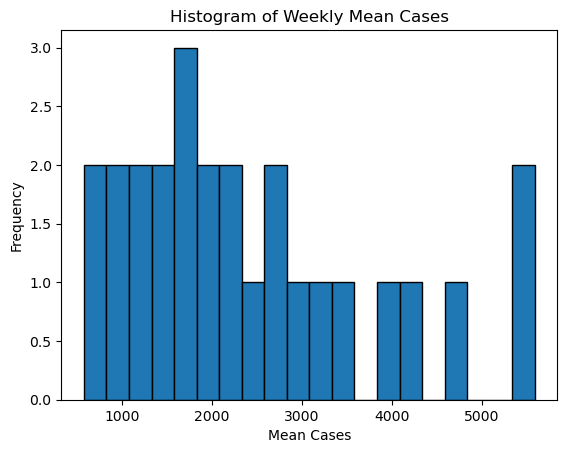

In [109]:
plt.hist(TN_mean_cases_df, bins=20, edgecolor='black')
plt.title('Histogram of Weekly Mean Cases')
plt.xlabel('Mean Cases')
plt.ylabel('Frequency')
plt.show()

# Poisson Distribution of Massachusetts in comparison to five other states (NC.VA,OH,KY,TN)



In [33]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('MA')]


cases_df = filtered_data.filter(like='Cases', axis=1) 
cases_df





,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
1239,1557,1561,1561,1563,1566,1570,1574,1578,1582,1586,...,4549,4680,4744,4801,4976,4976,4976,4976,4976,4976
1240,602,604,604,604,609,610,611,613,615,615,...,2422,2447,2488,2602,2633,2633,2633,2633,2633,2633
1241,8321,8331,8348,8365,8399,8426,8442,8460,8491,8527,...,29118,29681,30031,30874,31122,31122,31122,31122,31122,31122
1242,51,51,51,53,55,56,59,58,58,57,...,412,418,424,424,434,434,434,434,434,434
1243,16254,16283,16318,16342,16379,16414,16452,16469,16485,16530,...,50323,50870,51609,53118,53479,53479,53479,53479,53479,53479
1244,373,373,373,376,381,383,384,384,384,384,...,1134,1152,1169,1219,1236,1236,1236,1236,1236,1236
1245,6870,6883,6895,6903,6932,6943,6974,7000,7019,7039,...,22520,22713,23064,24071,24379,24379,24379,24379,24379,24379
1246,985,985,986,991,993,995,1001,1008,1008,1012,...,3184,3221,3264,3448,3507,3507,3507,3507,3507,3507
1247,24153,24193,24243,24300,24348,24377,24436,24483,24536,24600,...,66255,67039,67910,69108,69844,69844,69844,69844,69844,69844
1248,20,20,20,21,22,22,22,22,22,23,...,651,651,665,668,669,669,669,669,669,669


In [34]:
lambda_cases = cases_df.mean()

lambda_cases

2020-07-05_Cases     7605.333333
2020-07-06_Cases     7617.733333
2020-07-07_Cases     7632.066667
2020-07-08_Cases     7649.733333
2020-07-09_Cases     7663.066667
                        ...     
2020-12-23_Cases    23407.200000
2020-12-24_Cases    23407.200000
2020-12-25_Cases    23407.200000
2020-12-26_Cases    23439.733333
2020-12-27_Cases    23439.733333
Length: 176, dtype: float64

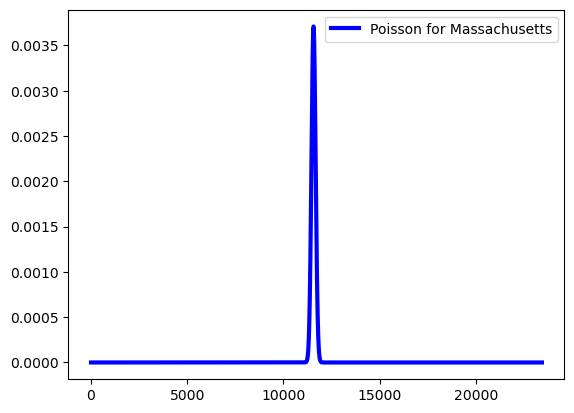

In [52]:
from scipy.stats import poisson

muMcase = np.mean(lambda_cases)
xMcase = np.arange(0, np.max(lambda_cases) + 1)
poissonMcase = poisson.pmf(xMcase, muMcase)

plt.plot(xMcase, poissonMcase, 'b', lw=3, label='Poisson for Massachusetts')

plt.legend()
plt.show()

In [39]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('NC')]


NCcases_df = filtered_data.filter(like='Cases', axis=1) 
NCcases_df


cases1 = NCcases_df.mean()

cases1


2020-07-05_Cases     709.950495
2020-07-06_Cases     724.990099
2020-07-07_Cases     738.237624
2020-07-08_Cases     752.356436
2020-07-09_Cases     772.178218
                       ...     
2020-12-23_Cases    4759.554455
2020-12-24_Cases    4759.554455
2020-12-25_Cases    4759.554455
2020-12-26_Cases    4759.554455
2020-12-27_Cases    4759.554455
Length: 176, dtype: float64

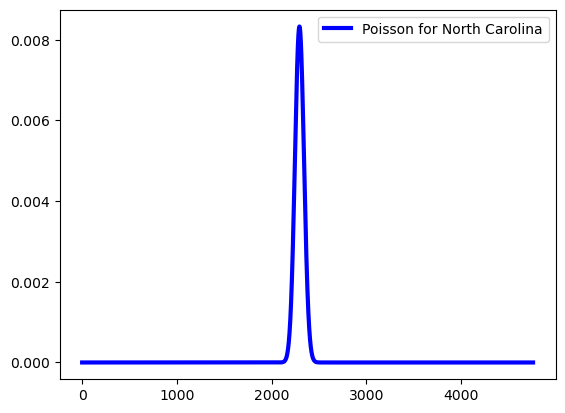

In [51]:
from scipy.stats import poisson

muNcase = np.mean(cases1)
xNcase = np.arange(0, np.max(cases1) + 1)
poissonNcase = poisson.pmf(xNcase, muNcase)

plt.plot(xNcase, poissonNcase, 'b', lw=3, label='Poisson for North Carolina')

plt.legend()
plt.show()

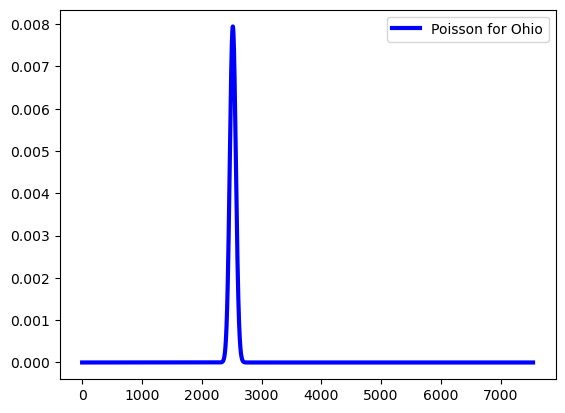

In [50]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('OH')]


OHcases_df = filtered_data.filter(like='Cases', axis=1) 
OHcases_df


cases2 = OHcases_df.mean()


from scipy.stats import poisson

muOcase = np.mean(cases2)
xOcase = np.arange(0, np.max(cases2) + 1)
poissonOcase = poisson.pmf(xOcase, muOcase)

plt.plot(xOcase, poissonOcase, 'b', lw=3, label='Poisson for Ohio')

plt.legend()
plt.show()

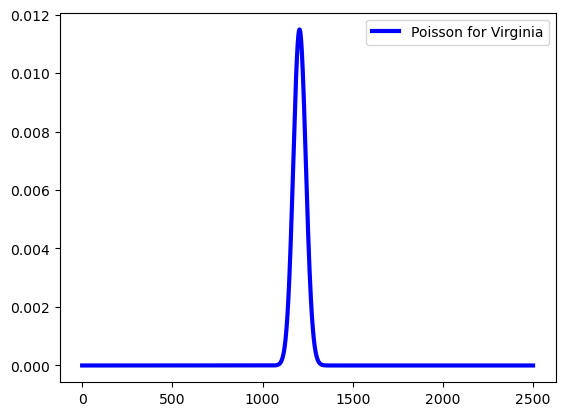

In [49]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('VA')]


VAcases_df = filtered_data.filter(like='Cases', axis=1) 
VAcases_df


cases3 = VAcases_df.mean()


from scipy.stats import poisson

muVcase = np.mean(cases3)
xVcase = np.arange(0, np.max(cases3) + 1)
poissonVcase = poisson.pmf(xVcase, muVcase)

plt.plot(xVcase, poissonVcase, 'b', lw=3, label='Poisson for Virginia')

plt.legend()
plt.show()

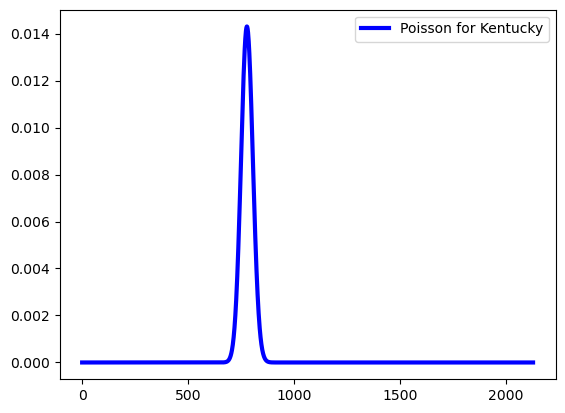

In [48]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('KY')]


KYcases_df = filtered_data.filter(like='Cases', axis=1) 
KYcases_df


cases4 = KYcases_df.mean()


from scipy.stats import poisson

muKcase = np.mean(cases4)
xKcase = np.arange(0, np.max(cases4) + 1)
poissonKcase = poisson.pmf(xKcase, muKcase)

plt.plot(xKcase, poissonKcase, 'b', lw=3, label='Poisson for Kentucky')

plt.legend()
plt.show()

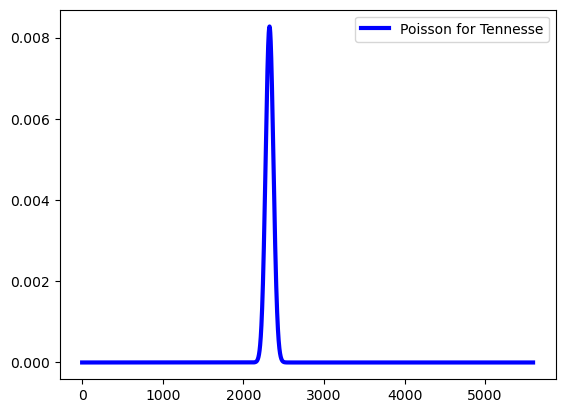

In [47]:

import pandas as pd 
import numpy as np
from scipy import stats
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('TN')]


TNcases_df = filtered_data.filter(like='Cases', axis=1) 
TNcases_df


cases5 = TNcases_df.mean()


from scipy.stats import poisson

muTcase = np.mean(cases5)
xTcase = np.arange(0, np.max(cases5) + 1)
poissonTcase = poisson.pmf(xTcase, muTcase)

plt.plot(xTcase, poissonTcase, 'b', lw=3, label='Poisson for Tennesse')

plt.legend()
plt.show()

# Correlation between enrichment data variables and covid 19 cases to observe patterns

In [172]:
election_data = pd.read_excel(r"C:\Users\mawul\Downloads\Presidential Election Data.xlsx")
election_df= pd.DataFrame(election_data)
election_df

,State,County Name,Candidate,Party,Total_votes,Won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


In [173]:
election_df[election_df['State'].str.contains('Massachusetts')]

massachusetts_election = election_df[election_df['State'].str.contains('Massachusetts')]

massachusetts_election

,State,County Name,Candidate,Party,Total_votes,Won
8674,Massachusetts,Barnstable,Joe Biden,DEM,16491,True
8675,Massachusetts,Barnstable,Donald Trump,REP,11436,False
8676,Massachusetts,Barnstable,Jo Jorgensen,LIB,365,False
8677,Massachusetts,Barnstable,Howie Hawkins,GRN,110,False
8678,Massachusetts,Barnstable,Write-ins,WRI,25,False
...,...,...,...,...,...,...
10424,Massachusetts,Worcester,Joe Biden,DEM,48584,True
10425,Massachusetts,Worcester,Donald Trump,REP,21169,False
10426,Massachusetts,Worcester,Jo Jorgensen,LIB,830,False
10427,Massachusetts,Worcester,Howie Hawkins,GRN,459,False


In [176]:

massachusetts_election.corr()


C:\Users\mawul\AppData\Local\Temp\ipykernel_13360\2755444436.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  massachusetts_election.corr()


,Total_votes,Won
Total_votes,1.000000,0.328379
Won,0.328379,1.000000


C:\Users\mawul\AppData\Local\Temp\ipykernel_13360\3357362184.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(massachusetts_election.corr(), annot = True)


<Axes: >

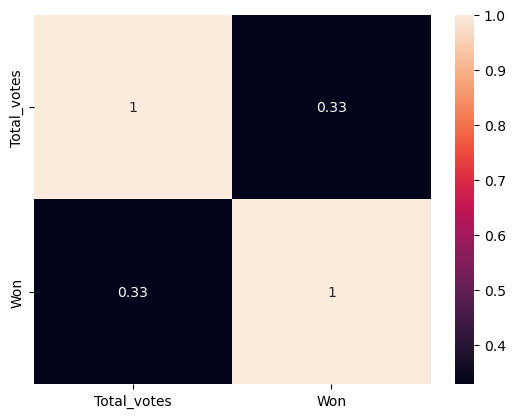

In [179]:
sns.heatmap(massachusetts_election.corr(), annot = True)

In [8]:

import pandas as pd 
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")

data



#repeated the same code from stage 2 dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-07-05') or ('2020-12-28' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

#assigned the filtered content into a dataframe to make it easy to manipulate  

filtered_data =data[data['State'].str.contains('MA')]


cases_df = filtered_data.filter(like='Cases', axis=1) 
cases_df





,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
1239,1557,1561,1561,1563,1566,1570,1574,1578,1582,1586,...,4549,4680,4744,4801,4976,4976,4976,4976,4976,4976
1240,602,604,604,604,609,610,611,613,615,615,...,2422,2447,2488,2602,2633,2633,2633,2633,2633,2633
1241,8321,8331,8348,8365,8399,8426,8442,8460,8491,8527,...,29118,29681,30031,30874,31122,31122,31122,31122,31122,31122
1242,51,51,51,53,55,56,59,58,58,57,...,412,418,424,424,434,434,434,434,434,434
1243,16254,16283,16318,16342,16379,16414,16452,16469,16485,16530,...,50323,50870,51609,53118,53479,53479,53479,53479,53479,53479
1244,373,373,373,376,381,383,384,384,384,384,...,1134,1152,1169,1219,1236,1236,1236,1236,1236,1236
1245,6870,6883,6895,6903,6932,6943,6974,7000,7019,7039,...,22520,22713,23064,24071,24379,24379,24379,24379,24379,24379
1246,985,985,986,991,993,995,1001,1008,1008,1012,...,3184,3221,3264,3448,3507,3507,3507,3507,3507,3507
1247,24153,24193,24243,24300,24348,24377,24436,24483,24536,24600,...,66255,67039,67910,69108,69844,69844,69844,69844,69844,69844
1248,20,20,20,21,22,22,22,22,22,23,...,651,651,665,668,669,669,669,669,669,669


In [16]:
correlation_matrix = cases_df.corr().round(2)
correlation_matrix


,2020-07-05_Cases,2020-07-06_Cases,2020-07-07_Cases,2020-07-08_Cases,2020-07-09_Cases,2020-07-10_Cases,2020-07-11_Cases,2020-07-12_Cases,2020-07-13_Cases,2020-07-14_Cases,...,2020-12-18_Cases,2020-12-19_Cases,2020-12-20_Cases,2020-12-21_Cases,2020-12-22_Cases,2020-12-23_Cases,2020-12-24_Cases,2020-12-25_Cases,2020-12-26_Cases,2020-12-27_Cases
2020-07-05_Cases,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
2020-07-06_Cases,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
2020-07-07_Cases,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
2020-07-08_Cases,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
2020-07-09_Cases,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23_Cases,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-12-24_Cases,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-12-25_Cases,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2020-12-26_Cases,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


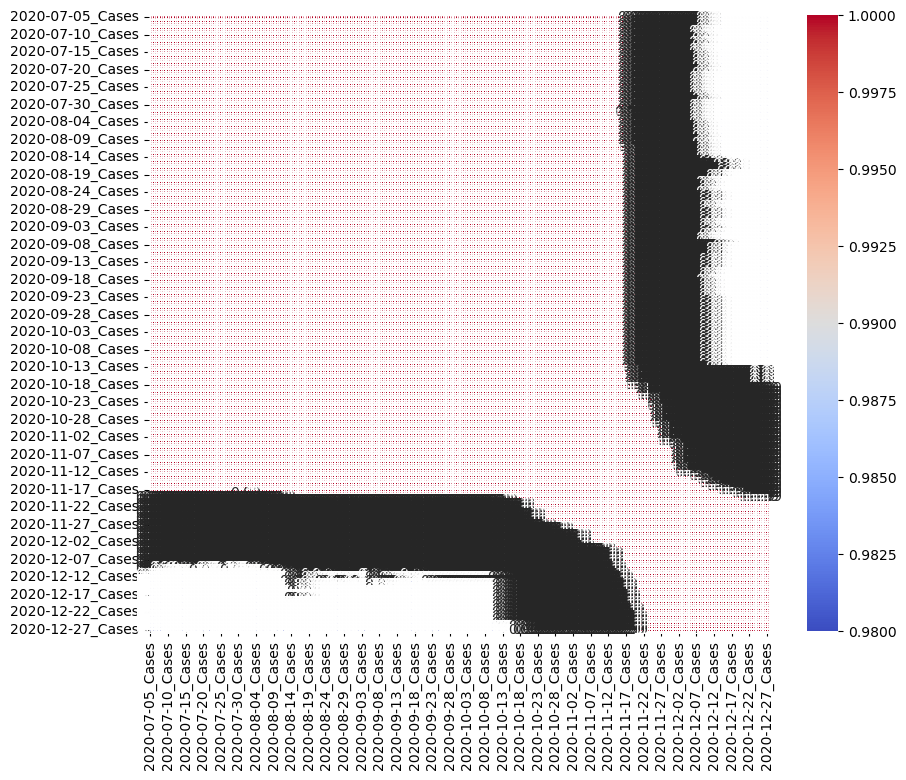

In [17]:

plt.figure(figsize=(10, 8))  # Set the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

# Formulate hypothesis between Enrichment data and number of cases to be compared against states. (Future Work)

In [ ]:
My Enrichment data variables are Population, Presidential Election Results and income 

The Hypothesis seeks to find whether there is a relation between covid 19 cases and population density, the presidential candidates people of a county prefers and their income levels. 

For the population Variable, 

(H0): There is no significant relationship between a state population density and the number of cases.

(H1): There is a significant relationship between a state's population density and the number of cases.

    
For the Presidential Election Variable, 

(H0): There is no significant relationship between a state pattern of vote and the number of cases
(H1): There is a significant relationship between a state pattern of vote and the number of cases
    

For the Income Variable, 

(H0): There is no significant relationship between a state income levels and number of cases 
(H1): There is significant relationship between a state income levels and number of cases 